#                                                      Moore Machine

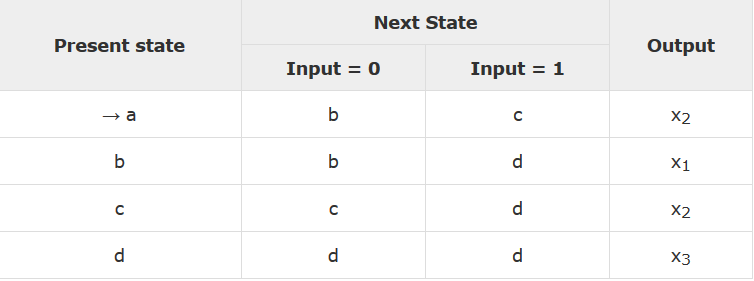

In [57]:
from IPython.display import Image
Image("Moore.png")

### State Object

In [58]:
class State(object):
    """
    We define a state object which provides some utility functions for the
    individual states within the state machine.
    """

    def __init__(self, name, inputs, output):
        self.name = name
        self.inputs = inputs
        self.output = output
    
    def return_name(self):
        return self.name
    
    def return_input(self):
        return self.inputs
    
    def return_output(self):
        return self.output

### Grab Inputs (States) and return them in a list

In [59]:
#Example
#s0 = State('s0', {0:'s1', 1:'s2'}, 1)

def add_states():
    num_of_states = int(input("How many states would you like: "))

    count = num_of_states
    statesL = []

    while (count != 0):
        
        name = str(input("Name of state: "))
        inputs = str(input("Input of the state 0:x and 1:y : "))
        x,y = inputs.split(' ')
        output = int(input("Output of the state: "))
    
        name = State(str(name), {0:str(x), 1:str(y)}, output)
        statesL.append(name)
    
        count = count - 1

    return statesL


### Call the Input Function 

In [30]:
s = add_states()

How many states would you like: 3
Name of state: s0
Input of the state 0:x and 1:y : s0 s1
Output of the state: 1
Name of state: s1
Input of the state 0:x and 1:y : s1 s2
Output of the state: 0
Name of state: s2 
Input of the state 0:x and 1:y : s2 s0
Output of the state: 1


### Loop through the List of States and Check for Output and Produce the Output String

In [71]:
def iterate_through_states(statesL, inputString): 
    #set current state
    current_state = statesL[0]
    #create an empty string for concatenation
    outputString = ''
    
    #loop through inputString
    for i in range(len(inputString)):
        
        temp = inputString[i] #temp for an element in the inputString

        Input = current_state.return_input() #a variable for the dictionary of the current state
        #EX: {0:'s1', 1:'s2'}
        
        output = current_state.return_output()   #a variable for the output of the current state
        
        #loop through the current state's dictionary
        #do calculation when current element in inputString is equal to a key in the inputs dict of statesL[i]
        #grab the item and add it to the empty string 
        for item in Input:

            if int(temp) == item:
                outputString = outputString + str(output)
                next_state = Input[item]
                for state in statesL:
                    if state.return_name() == next_state:
                        current_state = state
                        break
                        
    #return back to the first loop and continue on until inputString is done looping
    print("Output String: ", outputString)

        
iterate_through_states(s, '110')


Output String:  100


# Mealy Machine

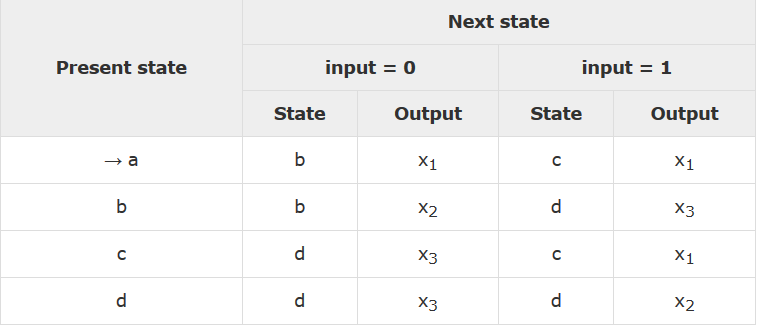

In [64]:
from IPython.display import Image
Image("Mealy.png")

In [61]:
class State(object):
    """
    We define a state object which provides some utility functions for the
    individual states within the state machine.
    """

    def __init__(self, name, next_state):
        self.name = name
        self.next_state = next_state
        
    def return_name(self):
        return self.name
    
    def return_input(self):
        return self.next_state
    

In [50]:
#Example
#s0 = State('s0', {0:('s1', 1), 1:('s2',0)})

def add_states():
    num_of_states = int(input("How many states would you like: "))

    count = num_of_states
    statesL = []

    while (count != 0):
        
        name = str(input("Name of state: "))
        inputs = str(input("Inputs and outputs of the state 0:x, o1 and 1:y,o2 : "))
        x,o1,y,o2 = inputs.split(' ')
        
        name = State(str(name), {0:(str(x), int(o1)), 1:(str(y),int(o2))})
        statesL.append(name)
    
        count = count - 1

    return statesL

In [51]:
statesL = add_states()

How many states would you like: 3
Name of state: s0
Inputs and outputs of the state 0:x, o1 and 1:y,o2 : s0 0 s1 1
Name of state: s1
Inputs and outputs of the state 0:x, o1 and 1:y,o2 : s1 1 s2 0
Name of state: s2 
Inputs and outputs of the state 0:x, o1 and 1:y,o2 : s2 1 s0 0


In [70]:
def iterate_through_states(statesL, inputString): 
    #set current state
    current_state = statesL[0]
    #create an empty string for concatenation
    outputString = ''
    
    #loop through inputString
    for i in range(len(inputString)):
        
        temp = inputString[i] #temp for an element in the inputString

        Input = current_state.return_input() #a variable for the dictionary of the current state
        #Example of Input
        #{0:('s1', 1), 1:('s2',0)}
        
        #loop through the current state's dictionary
        #do calculation when current element in inputString is equal to a key in the inputs dict of statesL[i]
        #grab the item and add it to the empty string 
        for item in Input:

            if int(temp) == item:
                output = Input[item]
                outputString = outputString + str(output[1])
                next_state = output[0]
                for state in statesL:
                    if state.return_name() == next_state:
                        current_state = state
                        break
                        
    #return back to the first loop and continue on until inputString is done looping
    print("Output String: ", outputString)

iterate_through_states(statesL, '10100')

Output String:  11011
